In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('data.csv')

print(df.columns[9]) 
print(df.columns[21])

To the nearest dollar, what is the maximum you would spend for a truly GREAT haircut?  (Just give the number! No units)
How would you describe the political affiliation of your parents?


In [3]:
haircut = df["To the nearest dollar, what is the maximum you would spend for a truly GREAT haircut?  (Just give the number! No units)"]
print(haircut)

0     100
1     100
2      50
3      60
4     100
     ... 
76    150
77    200
78    100
79    150
80    100
Name: To the nearest dollar, what is the maximum you would spend for a truly GREAT haircut?  (Just give the number! No units), Length: 81, dtype: int64


In [4]:
political_affiliation = df["How would you describe the political affiliation of your parents?"]
print(political_affiliation)

0              center
1              center
2              center
3      left of center
4      left of center
           ...       
76     left of center
77           far left
78    right of center
79     left of center
80             center
Name: How would you describe the political affiliation of your parents?, Length: 81, dtype: object


In [5]:
left = np.array([])
for i in range(80):
    if (political_affiliation[i] == "far left"):
        left = np.append(left, int(haircut[i]))
    if (political_affiliation[i] == "left of center"):
        left = np.append(left, int(haircut[i]))
left = left.astype('int32')

center = np.array([])
for i in range(80):
    if (political_affiliation[i] == "center"):
        center = np.append(center, int(haircut[i]))
center = center.astype('int32')
right = np.array([])
for i in range(80):
    if (political_affiliation[i] == "right of center"):
        right = np.append(right, int(haircut[i]))
    if (political_affiliation[i] == "far right"):
        right = np.append(right, int(haircut[i]))
right = right.astype('int32')

print("left:")
print(left)
print("\ncenter:")
print(center)
print("\nright:")
print(right)

left:
[ 60 100  20  33  30  50 100  50 250  50  45 200 100  60 300  45 100 150
 300 140 300 100  40 100   0  50 100  30  40 200  50   0  50  60 100 150
 200 150]

center:
[100 100  50  80 100 100  80  90  35  60  85  20  60  60 120 200 200  40
  80  30  50  40  70  90  35  60 100]

right:
[ 25  60 110  50 120 500  25  25 115 200  70 200  50 100 100]


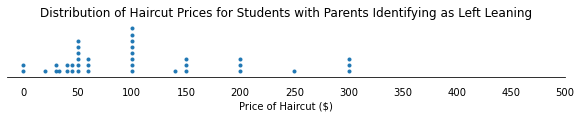

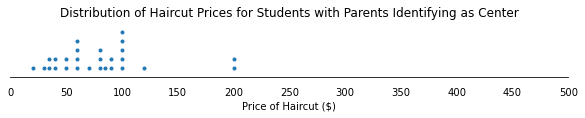

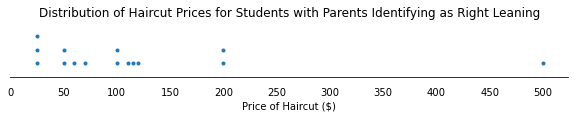

In [6]:
def dot_diagram(dataset, title):
    values, counts = np.unique(dataset, return_counts=True)
    width = 10
    height = 1
    marker_size = 3
    fig, ax = plt.subplots(figsize=(width, height))
    for value, count in zip(values, counts):
        ax.plot([value]*count, list(range(count)), marker='o', color='tab:blue',
                ms=marker_size, linestyle='')
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_ylim(-1, max(counts))
    ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
    ax.set_xlabel("Price of Haircut ($)")
    ax.tick_params(axis='x', length=0, pad=10)
    ax.set_title(title)
    
dot_diagram(left, "Distribution of Haircut Prices for Students with Parents Identifying as Left Leaning")
dot_diagram(center, "Distribution of Haircut Prices for Students with Parents Identifying as Center")
dot_diagram(right, "Distribution of Haircut Prices for Students with Parents Identifying as Right Leaning")


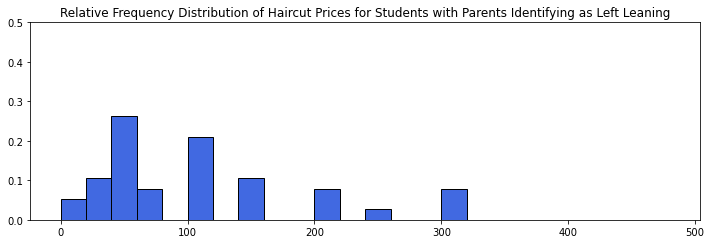

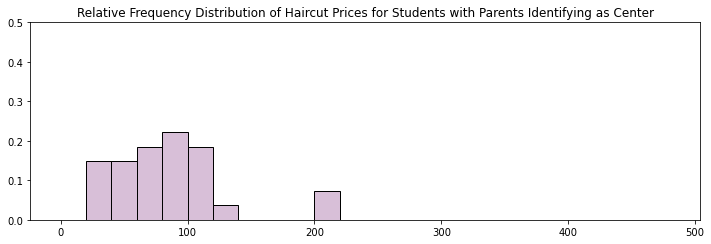

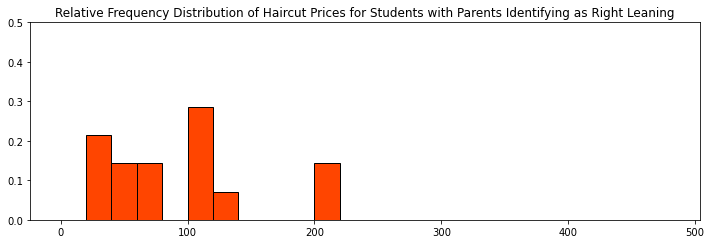

In [95]:
def historgram(dataset, title, color):
    increments = np.arange(0, 500, 20)
    hist, edges = np.histogram(dataset, increments)
    freq = hist/float(hist.sum())
    plt.figure().set_figwidth(10)
    plt.bar(increments[:-1], freq, width=20, align="edge", ec="k", color=color)
    plt.ylim(top=0.5)
    plt.title(title)
    plt.show()

historgram(left, "Relative Frequency Distribution of Haircut Prices for Students with Parents Identifying as Left Leaning", 'royalblue')
historgram(center, "Relative Frequency Distribution of Haircut Prices for Students with Parents Identifying as Center", 'thistle')
historgram(right, "Relative Frequency Distribution of Haircut Prices for Students with Parents Identifying as Right Leaning", 'orangered')

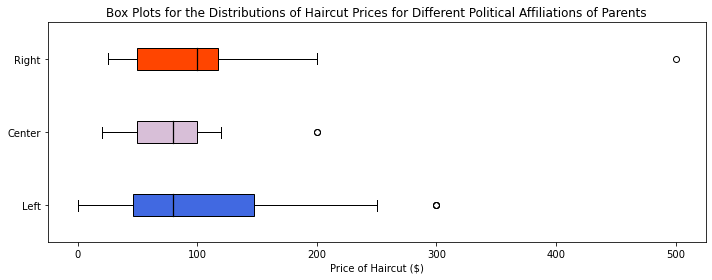

In [94]:
def box_plot(dataset, title, labels):
    fig = plt.figure(figsize =(10, 4))
    ax = fig.add_subplot(111)
    medianproprs = dict(linestyle='-', linewidth=1.25, color='black')
    plot = ax.boxplot(dataset, vert=0, patch_artist=True, medianprops=medianproprs)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Price of Haircut ($)")
    plt.title(title)
    for patch, color in zip(plot['boxes'], ['royalblue', 'thistle', 'orangered']):
            patch.set_facecolor(color)
    plt.show()

box_plot([left, center, right], "Box Plots for the Distributions of Haircut Prices for Different Political Affiliations of Parents", ["Left", "Center", "Right"])

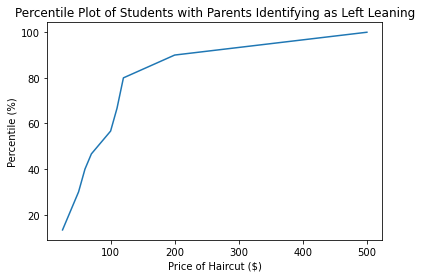

In [8]:
def percentile_plot(dataset, title):
    dataset = np.sort(dataset)
    percentiles = np.array([])
    data_points = np.array([])
    for data in dataset:
        percentiles = np.append(percentiles, stats.percentileofscore(dataset, data))
        data_points = np.append(data_points, data)

    plt.ylabel("Percentile (%)")
    plt.xlabel("Price of Haircut ($)")
    plt.title(title)
    plt.plot(data_points, percentiles)
    plt.show()

percentile_plot(right, "Percentile Plot of Students with Parents Identifying as Left Leaning")

In [9]:
print(f'{"Left Mean: "}{left.mean()}')
print(f'{"Center Mean: "}{center.mean()}')
print(f'{"Right Mean: "}{right.mean()}')

Left Mean: 102.71052631578948
Center Mean: 79.07407407407408
Right Mean: 116.66666666666667


In [10]:
print(f'{"Left Standard Deviation: "}{np.std(left)}')
print(f'{"Center Standard Deviation: "}{np.std(center)}')
print(f'{"Right Standard Deviation: "}{np.std(right)}')

Left Standard Deviation: 81.92740942756866
Center Standard Deviation: 42.796612816753445
Right Standard Deviation: 115.73917035971684


In [11]:
print(f'{"Left Median: "}{np.median(left)}')
print(f'{"Center Median: "}{np.median(center)}')
print(f'{"Right Median: "}{np.median(right)}')

Left Median: 80.0
Center Median: 80.0
Right Median: 100.0


In [12]:
def IQR(dist):
    return np.percentile(dist, 75) - np.percentile(dist, 25)

print(f'{"Left IQR: "}{IQR(left)}')
print(f'{"Center IQR: "}{IQR(center)}')
print(f'{"Right IQR: "}{IQR(right)}')

Left IQR: 101.25
Center IQR: 50.0
Right IQR: 67.5


In [13]:
def get_outliers(dist):
    iqr = IQR(dist)
    outliers = np.array([])
    for data in dist:
        if data > (1.5 * iqr + np.percentile(dist, 75)) or data < (np.percentile(dist, 25) - 1.5 * iqr):
            outliers = np.append(outliers, data)
    return np.sort(outliers)

print(f'{"Left Outliers: "}{get_outliers(left)}')
print(f'{"Center Outliers: "}{get_outliers(center)}')
print(f'{"Right Outliers: "}{get_outliers(right)}')

Left Outliers: [300. 300. 300.]
Center Outliers: [200. 200.]
Right Outliers: [500.]


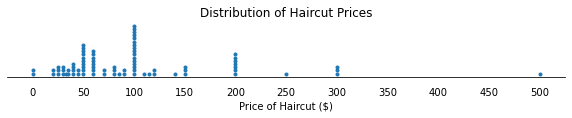

In [14]:
dot_diagram(haircut, "Distribution of Haircut Prices")